In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/LLM_MODEL_CLASSIFCATION (1)

Mounted at /content/drive
/content/drive/My Drive/LLM_MODEL_CLASSIFCATION (1)


In [4]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
import tensorflow as tf
import pandas as pd
import keras
import pandas as pd
import tensorflow as tf
import transformers
from sklearn.model_selection import train_test_split
import zipfile
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [5]:
import pickle

# Loading the data from the pickle file
with open('testtext.pkl', 'rb') as file:
    test_texts = pickle.load(file)
with open('testlabel.pkl', 'rb') as file:
    test_labels = pickle.load(file)
print(test_texts)

['cosa vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero person seems displaying angry emotion', 'oh god happened im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry person seems displaying sad emotion', 'please please dont im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im person seems displaying angry emotion', 'hell talking im talking fact im big fan show im talking fact im big fan show im

In [6]:
count=0
for i in test_texts:
  print(f'{count} - {i}')
  count+=1

0 - cosa vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero vero person seems displaying angry emotion
1 - oh god happened im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry im sorry person seems displaying sad emotion
2 - please please dont im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im doctor im person seems displaying angry emotion
3 - hell talking im talking fact im big fan show im talking fact im big fan sh

In [7]:
save_directory = "model"
loaded_tokenizer = DistilBertTokenizer.from_pretrained(save_directory)
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [8]:
def predict_category(text):

    predict_input = loaded_tokenizer.encode(text,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

    output = loaded_model(predict_input)[0]

    prediction_value = tf.argmax(output, axis=1).numpy()[0]

    return prediction_value
y_pred = []
for text_ in test_texts:
    y_pred.append(predict_category(text_))

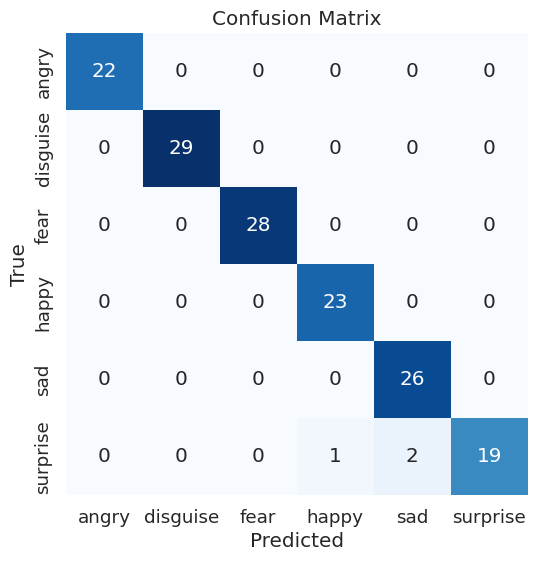

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=['angry', 'disguise', 'fear', 'happy', 'sad', 'surprise'], yticklabels=['angry', 'disguise', 'fear', 'happy', 'sad', 'surprise'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming Y_true and Y_pred_classes are defined
# Y_true: Actual labels
# Y_pred_classes: Predicted labels

# Compute accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(test_labels, y_pred, average='weighted')
print("Precision:", precision)

# Compute recall
recall = recall_score(test_labels, y_pred, average='weighted')
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(test_labels, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.98
Precision: 0.9812301587301586
Recall: 0.98
F1 Score: 0.9795861282489894


In [12]:
test_text="got plus signal processing im sure im going able get result different signal processing method im sure im going able get result different signal processing"
label_info=[ 'angry', 'disguise', 'fear', 'happy', 'sad', 'surprise']
predict_input = loaded_tokenizer.encode(test_text,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

output = loaded_model(predict_input)[0]

prediction_value = tf.argmax(output, axis=1).numpy()[0]
label_info[prediction_value]

'happy'